In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
df.shape

(21293, 4)

In [5]:
df.describe().style.background_gradient(cmap='Blues')

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [6]:
df['datetime'] = pd.to_datetime(df.Date+' '+df.Time)

In [7]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [8]:
df.drop(['Date', 'Time'], axis=1, inplace =True)

In [9]:
df.head()

,Transaction,Item,datetime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57


In [17]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [10]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [11]:
df['beverage'] = df.Item.isin(beverage).astype(int)
df['other'] = df.Item.isin(other).astype(int)
df['kids'] = df.Item.isin(kids).astype(int)
df['snacks'] = df.Item.isin(snacks).astype(int)
df['bread'] = df.Item.isin(bread).astype(int)
df['breakfast_pastry'] = df.Item.isin(breakfast_pastry).astype(int)
df['breakfast'] = df.Item.isin(breakfast).astype(int)
df['dessert'] = df.Item.isin(dessert).astype(int)
df['condiments'] = df.Item.isin(condiments).astype(int)
df['lunch'] = df.Item.isin(lunch).astype(int)
df['other_food'] = df.Item.isin(other_food).astype(int)

In [13]:
df.head(20)

,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0
5,3,Cookies,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0
6,4,Muffin,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
7,5,Coffee,2016-10-30 10:13:03,1,0,0,0,0,0,0,0,0,0,0
8,5,Pastry,2016-10-30 10:13:03,0,0,0,0,0,1,0,0,0,0,0
9,5,Bread,2016-10-30 10:13:03,0,0,0,0,1,0,0,0,0,0,0


In [15]:
df_group = df.groupby(['Transaction', 'datetime']).sum()
df_group.reset_index(level='datetime', inplace =True)

df_group.tail()

,datetime,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
Transaction,,,,,,,,,,,,,
9680,2017-04-09 14:24:03,Bread,0,0,0,0,1,0,0,0,0,0,0
9681,2017-04-09 14:30:09,TrufflesTeaSpanish BrunchChristmas common,1,1,0,0,0,0,0,1,0,0,1
9682,2017-04-09 14:32:58,MuffinTacos/FajitaCoffeeTea,2,0,0,0,0,1,0,0,0,0,1
9683,2017-04-09 14:57:06,CoffeePastry,1,0,0,0,0,1,0,0,0,0,0
9684,2017-04-09 15:04:24,Smoothies,1,0,0,0,0,0,0,0,0,0,0


In [19]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9531 entries, 1 to 9684
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          9531 non-null   datetime64[ns]
 1   Item              9531 non-null   object        
 2   beverage          9531 non-null   int32         
 3   other             9531 non-null   int32         
 4   kids              9531 non-null   int32         
 5   snacks            9531 non-null   int32         
 6   bread             9531 non-null   int32         
 7   breakfast_pastry  9531 non-null   int32         
 8   breakfast         9531 non-null   int32         
 9   dessert           9531 non-null   int32         
 10  condiments        9531 non-null   int32         
 11  lunch             9531 non-null   int32         
 12  other_food        9531 non-null   int32         
 13  hour              9531 non-null   int32         
 14  weekday           9531 non-nu

In [16]:
df_group['hour']=df_group.datetime.dt.hour
df_group['weekday']=df_group.datetime.dt.day_name()
df_group.head()

,datetime,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,Bread,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,ScandinavianScandinavian,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,Hot chocolateJamCookies,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,Muffin,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,CoffeePastryBread,1,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [20]:
df_group.weekday.value_counts()

weekday
Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: count, dtype: int64

<Axes: >

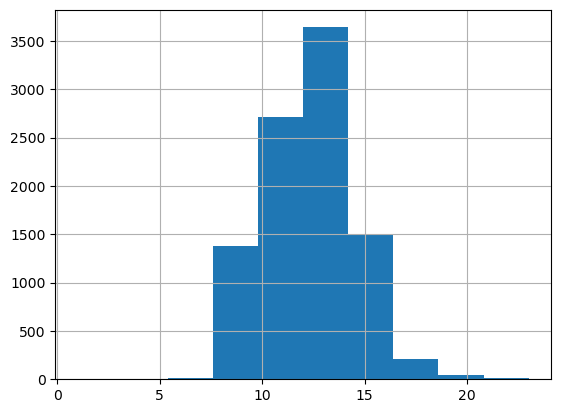

In [24]:
df_group.hour.hist()

In [25]:
df_group.datetime.dt.month.value_counts()

datetime
11    2154
3     1768
12    1696
2     1630
1     1598
4      510
10     175
Name: count, dtype: int64

In [23]:
df_ml = pd.get_dummies(data=df_group, columns=['weekday'], drop_first = True).copy()

In [24]:
df_ml.head()

,datetime,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,Bread,0,0,0,0,1,0,0,0,0,0,0,9,False,False,True,False,False,False
2,2016-10-30 10:05:34,ScandinavianScandinavian,0,0,0,0,2,0,0,0,0,0,0,10,False,False,True,False,False,False
3,2016-10-30 10:07:57,Hot chocolateJamCookies,1,0,0,0,0,0,0,1,1,0,0,10,False,False,True,False,False,False
4,2016-10-30 10:08:41,Muffin,0,0,0,0,0,1,0,0,0,0,0,10,False,False,True,False,False,False
5,2016-10-30 10:13:03,CoffeePastryBread,1,0,0,0,1,1,0,0,0,0,0,10,False,False,True,False,False,False


In [25]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9531 entries, 1 to 9684
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           9531 non-null   datetime64[ns]
 1   Item               9531 non-null   object        
 2   beverage           9531 non-null   int32         
 3   other              9531 non-null   int32         
 4   kids               9531 non-null   int32         
 5   snacks             9531 non-null   int32         
 6   bread              9531 non-null   int32         
 7   breakfast_pastry   9531 non-null   int32         
 8   breakfast          9531 non-null   int32         
 9   dessert            9531 non-null   int32         
 10  condiments         9531 non-null   int32         
 11  lunch              9531 non-null   int32         
 12  other_food         9531 non-null   int32         
 13  hour               9531 non-null   int32         
 14  weekday_Monda

In [34]:
df_ml.to_csv("df_ml.csv")

In [26]:
from sklearn.decomposition import PCA

In [27]:
# Exclure colonnes datetime

df_ml_numeric = df_ml.select_dtypes(exclude=['datetime', 'object'])



In [28]:
from sklearn.decomposition import PCA

pca = PCA(0.85)
pca.fit(df_ml_numeric)

df_pca = pca.transform(df_ml_numeric)
print(df_pca.shape)


(9531, 5)


In [38]:
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i) for i in range(1,6)])

In [39]:
from sklearn.cluster import KMeans

In [40]:
!pip install yellowbrick

In [41]:
from yellowbrick.cluster import KElbowVisualizer

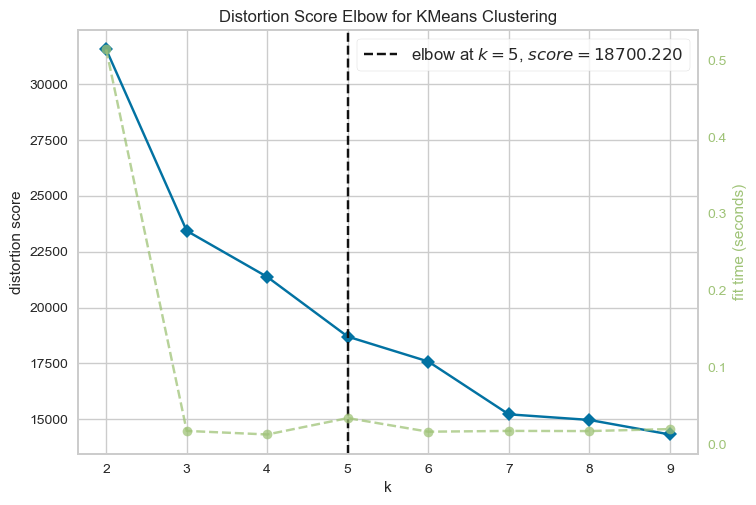

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Définir ton estimateur
model = KMeans()

#  Syntaxe correcte : estimator en positionnel
visualizer = KElbowVisualizer(model, k=(2, 10))

# Fit sur tes données PCA
visualizer.fit(df_pca)

# Affiche le graphe (nouvelle API : show())
visualizer.show()


In [45]:
model = KMeans(5)
model.fit(df_pca)
y_pred = model.predict(df_pca)

#y_pred = model.predict(df_ml)


In [46]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4]), array([1780, 1977, 2073, 1860, 1841], dtype=int64))

In [47]:
model.cluster_centers_

array([[ 3.6046354 , -0.01917799,  0.03552745,  0.00534854,  0.06277266],
       [-3.0831313 , -0.27994957,  0.04104743,  0.00744837,  0.03868768],
       [ 1.39808748,  0.12652504, -0.07783474,  0.00725648, -0.07417179],
       [-0.35922152, -0.60354796,  0.02392647,  0.02115227, -0.04669765],
       [-1.38565113,  0.78648014, -0.01496005, -0.04271143,  0.02846   ]])

In [48]:
df_ml['cluster'] = model.labels_

In [49]:
df_group['cluster'] = model.labels_

In [50]:
import seaborn as sns

In [52]:

sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize=='columns'))

NameError: name 'normalize' is not defined

In [ ]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.hour, normalize=='columns'))

In [42]:
df[['Transaction', 'Item']]

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [44]:
df_group['cluster'].reset_index()

In [ ]:
df.merge(items,clusters, on='Transaction')
merge.groupby('cluster').Item.apply(lambda x:x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

In [45]:
#Just KMeans

In [46]:
df_ml

,datetime,baverage,other,kids,beverage,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,2016-10-30 10:07:57,1,0,0,1,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,2016-10-30 10:13:03,1,0,0,1,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,2017-04-09 14:30:09,1,1,0,1,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2017-04-09 14:32:58,2,0,0,2,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


In [47]:
model = KMeans(5)
model.fit(df_ml)
model.labels_

TypeError: invalid type promotion

In [ ]:
df_group.cluster = model.labels_

In [ ]:
df_group.cluster.value_counts()

In [48]:
df_ml

,datetime,baverage,other,kids,beverage,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,2016-10-30 10:07:57,1,0,0,1,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,2016-10-30 10:13:03,1,0,0,1,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,2017-04-09 14:30:09,1,1,0,1,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2017-04-09 14:32:58,2,0,0,2,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


In [49]:
df_ml.hour = df_ml.hour/24

In [50]:
pca = PCA(0.85)
pca.fit(df_ml)

TypeError: invalid type promotion